In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
data=pd.read_csv('diabetes.csv')

In [110]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [114]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [115]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn=KNeighborsClassifier(10)

In [119]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [120]:
y_pred=knn.predict(x_test)

In [121]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,mean_squared_error

In [123]:
accuracy=accuracy_score(y_pred,y_test)

In [124]:
accuracy

0.7662337662337663

In [125]:
error=1-accuracy

In [126]:
error

0.23376623376623373

In [127]:
cf=confusion_matrix(y_pred,y_test)

In [128]:
cf

array([[86, 23],
       [13, 32]], dtype=int64)

In [129]:
fpn=cf[0,1]+cf[1,0]

In [130]:
fpn

36

In [131]:
total=cf[0,0]+cf[0,1]+cf[1,0]+cf[1,1]

In [132]:
total

154

In [133]:
error1=fpn/total

In [134]:
error1

0.23376623376623376

In [135]:
precision=cf[1,1]/(cf[1,1]+cf[0,1])

In [136]:
precision

0.5818181818181818

In [137]:
recall=cf[1,1]/(cf[1,1]+cf[1,0])

In [138]:
recall

0.7111111111111111

In [139]:
pre=precision_score(y_pred,y_test) #without formula

In [140]:
pre

0.5818181818181818

In [141]:
re=recall_score(y_pred,y_test)#without formula

In [142]:
re

0.7111111111111111

In [144]:
#the below code is for better understanding how knn changes it is not necessary but you can try
def knn(x_train,y_train,x_test,y_test,n):
    k=range(1,n)
    result=[]
    for n in k:
        knn=KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_test)
        acc=accuracy_score(y_pred,y_test)
        result.append(acc)
    return result

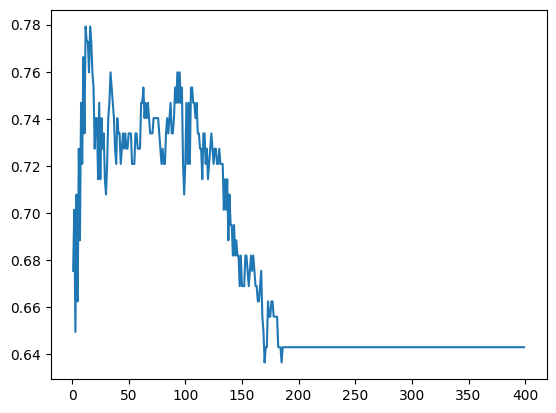

In [145]:
# better understanding with plot
n=400
output=knn(x_train,y_train,x_test,y_test,n)
k=range(1,n)
plt.plot(k,output)